### Patent annotation:  A novel dataset to highlight patent passages

#### Types of data samples

- *neutral_samples*: Here the paragraphs just above 'Advantageous Effects of Invention' are collected. 
   To have a nearly uniformed sequence lengths, only 3 paragraphs are collected. 

- *positive_samples*: All paragraphs from section/heading 'Advantageous Effects of Invention'
	are collected.

- *negative samples*: Paragraphs under the section 'Technical Problem' are collected. 


- Some of the examples patents containing interested tags as mentioned above are: (just for reference)
- You can open Google patents in advanced mode and search for below patents and look for above tags. 
    - US10842211B2
    - US10842310B2
    - US10842344B2 
	


### Get the statistics

Raw data can be downloaded from: https://bulkdata.uspto.gov/data/patent/grant/redbook/fulltext/2020/ 

1. Traverse USPTO bulk data files directory. 
2. Each xml file contains patents (nearly 8k) granted per week. Essentially, there are 52 such xml files per every year. Each such xml file is a nested file, such that it contains nearly 8k patents and each patent is embedded in xml file.
3. Per each week, find the total number of patents and total number of pos/neg/neutral samples found and write these statistics to a csv file. 

#### For instance:

- Year 2020 contains week_1.xml, week_2.xml, ...week_52.xml (total 52 xml files)
- week_1.xml is nested file, means to say, it further contains 8k .xml files, each one for a patent. 

#### Download the files from USPTO:
- use this url: https://bulkdata.uspto.gov/data/patent/grant/redbook/fulltext/2020/ 
- save it to a directory, for instance: "/home/renuk/Documents/USPTO_BULK_DATA/patents/2020/"
- Now you can execute the below codes. 

In [ ]:
def stats(filename):
    #home_dir = "/home/renuk/Documents/USPTO_BULK_DATA/patents/2020/"
    #file_path =home_dir+filename
    
    total_neutral_samples = 0 #total_positive_samples , total_negative_samples, total_neutral_samples
    total_publications = 0
    xml_text = html.unescape(open(filename, 'r').read())
    weekly_filename = filename.split('/')
    weekly_filename = weekly_filename[-1]
    print(weekly_filename)
    for patent in xml_text.split("<?xml version=\"1.0\" encoding=\"UTF-8\"?>"):

        if patent is None or patent == "":
            continue
        patent_text = patent
    
        bs = BeautifulSoup(patent, "lxml")
            
                #try:
                
        fwu_neutral = bs.find('heading',text='Solution to Problem') #fwu_advantages, fwu_problems, fwu_neutral
    
        #Advantageous Effects of Invention --- for positive samples
        #Technical Problem --- for negative samples
        #Solution to Problem --- for neutral samples, also the paragraphs (2/3) which are just above the 'Advantageous Effects of Invention' section can be used for neural samples 
        
        
        
        
        
        
    ##### search for application or grant
        application = bs.find('us-patent-application')
        if application is None: # If no application, search for grant
            application = bs.find('us-patent-grant')
        
        title = "None"
            
    #### Search for its title
            
        try:
            title = application.find('invention-title').text
        except Exception as e:          
            #print("no title found")
            title = ""
                
        #print("patent is:", title)
            
            
    #### Search for publication number
        try:
            #publication_country = application.find('publication-reference').find('country').text
            #publication_doc_number = application.find('publication-reference').find('doc-number').text
            publication_kind = application.find('publication-reference').find('kind').text
            #publication_num = publication_country+publication_doc_number+publication_kind
        except Exception as e:
            #publication_num = ""
            publication_kind = ""
        
        
        try:
            publication_num = application['file'].split("-")[0]
        
        except Exception as e:
            publication_num = ""
        
        
        publication_num = publication_num+publication_kind
        #print(publication_num)  
    
        try:
            application_type = application.find('application-reference')['appl-type']
        
        except Exception as e:
            application_type =''
        #print(application_type)
            
        if publication_num:
            total_publications +=1

        if fwu_neutral:  #fwu_advantages, fwu_problems, fwu_neutral
            total_neutral_samples +=1
        
    
 
    return weekly_filename, total_publications, total_neutral_samples
   
 

In [ ]:
import time

import pprint
import os
import sys
import html
import datetime
import pandas as pd
from bs4 import BeautifulSoup
import re
from datetime import datetime



path = "/home/renuk/Documents/USPTO_BULK_DATA/patents/2020/" #directory containing weekly xml files (i.e., 52 files per year)
all_files = glob.glob(os.path.join(path, "ipg*.xml"))
df = pd.DataFrame(columns=['weekly_filename', 'total_publications', 'total_neutral_samples'])
for filename in all_files:
    weekly_filename, total_publications, total_neutral_samples = stats(filename)
    df = df.append({'weekly_filename':weekly_filename, 'total_publications': total_publications,
                                'total_neutral_samples':total_neutral_samples},ignore_index=True)
df.to_csv("/home/renuk/Documents/USPTO_BULK_DATA/patents/2020_neutral_stats.csv")

### Traverse 52 xml files and access postive, negative and neutral samples. 

In [2]:
# import the following 
import os, glob
import pandas as pd

import time

import pprint
import os
import sys
import html
import datetime
import pandas as pd
from bs4 import BeautifulSoup
import re
from datetime import datetime

#### Note:
- change the name of 4th coloumn according to your sample of interest. For instance: 'positive_text' for +ve label.
- change tags also accordingly. For instance: fwu_advantages = bs.find('heading',text='Advantageous Effects of Invention') for +ve labels
- go through each line of code and change the variable name wherever necessary.
- Below code traverse each weekly xml file, find the labels, if found then it will collect the pargarphs from that particular section or tag. 
- For every weekly xml, there is seperate csv file is stored with data automatically. For instance: '/home/renuk/Documents/USPTO_BULK_DATA/patents/2020/ipg200211.csv'

### Case 1: Fetch negative samples from 2020

In [3]:
def get_xml_data(filename):
    #home_dir = "/home/renuk/Documents/USPTO_BULK_DATA/patents/2020/"
    #file_path =home_dir+filename
    
    csv_dir = "/home/renuk/Documents/USPTO_BULK_DATA/patents/2020_neg_updated/"

    df = pd.DataFrame(columns=['publication_number', 'patent_title', 'appl_type', 
                           'negative_text'])
    total_negative_samples = 0
    total_publications = 0
    xml_text = html.unescape(open(filename, 'r').read())
    for patent in xml_text.split("<?xml version=\"1.0\" encoding=\"UTF-8\"?>"):

        if patent is None or patent == "":
            continue
        patent_text = patent
    
        bs = BeautifulSoup(patent, "lxml")
            
                #try:
                
        fwu_problems = bs.find('heading',text='Technical Problem')
    
                #except Exception as e:
        
        
        
        
        
        
        
    ##### search for application or grant
        application = bs.find('us-patent-application')
        if application is None: # If no application, search for grant
            application = bs.find('us-patent-grant')
        
        title = "None"
            
    #### Search for its title
            
        try:
            title = application.find('invention-title').text
        except Exception as e:          
            #print("no title found")
            title = ""
                
        #print("patent is:", title)
            
            
    #### Search for publication number
        try:
            #publication_country = application.find('publication-reference').find('country').text
            #publication_doc_number = application.find('publication-reference').find('doc-number').text
            publication_kind = application.find('publication-reference').find('kind').text
            #publication_num = publication_country+publication_doc_number+publication_kind
        except Exception as e:
            #publication_num = ""
            publication_kind = ""
        
        
        try:
            publication_num = application['file'].split("-")[0]
        
        except Exception as e:
            publication_num = ""
        
        
        publication_num = publication_num+publication_kind
        #print(publication_num)  
    
        try:
            application_type = application.find('application-reference')['appl-type']
        
        except Exception as e:
            application_type =''
        #print(application_type)
            
        if publication_num:
            total_publications +=1

        if fwu_problems:
            total_negative_samples +=1
        
            text = patent_text.splitlines()
            adv = []
            neg_text=""
            for i in text:
                #print(type(i))
                
                start = text.index(i)
                iteration = 1
                if ('>Technical Problem<'in i and iteration==1):
                    for j in range(20):
                        if '<p' in text[start+1]:
                            neg_text = text[start+1]
                            #print(neg_text)
                            adv.append(text[start+1])
                            start = start+1
                        else:
                            continue
                        
                    #print("patent is:", title)
                    #print(publication_num)
                    #print(application_type)
                    #print('-----------')
                    df = df.append({'publication_number':publication_num, 'patent_title': title,
                                'appl_type':application_type,
                               'negative_text':adv},ignore_index=True)
                
                    iteration=0
                
        #print('-----------')
        
        
        #else:
            #total_not_found +=1
        
    #file = filename
    #name = file.split('.')
    #name =name[0]+'.csv'
    #name = name[-1].split('.')[0]   
    
    csv = filename.split('/')[-1].split('.')[0]+'_negative.csv'
    csv_filename = csv_dir+csv
    
    
    df.to_csv(csv_filename)  # for each week, there will be a seperate csv file created and later you can merge them
    print('total publications in',filename,total_publications )
    print('total negative samples in ', filename,total_negative_samples )
    df.shape
    print("------------")
    

In [4]:
# call get_xml_data from here.

from datetime import datetime

begin = datetime.now()

current_time = begin.strftime("%H:%M:%S")
print("Current Time =", current_time)

path = "/home/renuk/Documents/USPTO_BULK_DATA/patents/2020/"
all_files = glob.glob(os.path.join(path, "ipg*.xml"))
for filename in all_files:
    get_xml_data(filename)
    
end = datetime.now()

current_time = end.strftime("%H:%M:%S")
print("Current Time =", current_time)

Current Time = 14:44:50
total publications in /home/renuk/Documents/USPTO_BULK_DATA/patents/2020/ipg201117.xml 7901
total negative samples in  /home/renuk/Documents/USPTO_BULK_DATA/patents/2020/ipg201117.xml 300
------------
total publications in /home/renuk/Documents/USPTO_BULK_DATA/patents/2020/ipg200901.xml 7886
total negative samples in  /home/renuk/Documents/USPTO_BULK_DATA/patents/2020/ipg200901.xml 308
------------
total publications in /home/renuk/Documents/USPTO_BULK_DATA/patents/2020/ipg200421.xml 7875
total negative samples in  /home/renuk/Documents/USPTO_BULK_DATA/patents/2020/ipg200421.xml 341
------------
total publications in /home/renuk/Documents/USPTO_BULK_DATA/patents/2020/ipg200310.xml 6130
total negative samples in  /home/renuk/Documents/USPTO_BULK_DATA/patents/2020/ipg200310.xml 218
------------
total publications in /home/renuk/Documents/USPTO_BULK_DATA/patents/2020/ipg200623.xml 7869
total negative samples in  /home/renuk/Documents/USPTO_BULK_DATA/patents/2020/ip

total publications in /home/renuk/Documents/USPTO_BULK_DATA/patents/2020/ipg201020.xml 7902
total negative samples in  /home/renuk/Documents/USPTO_BULK_DATA/patents/2020/ipg201020.xml 337
------------
total publications in /home/renuk/Documents/USPTO_BULK_DATA/patents/2020/ipg200331.xml 7898
total negative samples in  /home/renuk/Documents/USPTO_BULK_DATA/patents/2020/ipg200331.xml 321
------------
total publications in /home/renuk/Documents/USPTO_BULK_DATA/patents/2020/ipg200317.xml 7875
total negative samples in  /home/renuk/Documents/USPTO_BULK_DATA/patents/2020/ipg200317.xml 292
------------
total publications in /home/renuk/Documents/USPTO_BULK_DATA/patents/2020/ipg200512.xml 3361
total negative samples in  /home/renuk/Documents/USPTO_BULK_DATA/patents/2020/ipg200512.xml 131
------------
total publications in /home/renuk/Documents/USPTO_BULK_DATA/patents/2020/ipg200825.xml 7889
total negative samples in  /home/renuk/Documents/USPTO_BULK_DATA/patents/2020/ipg200825.xml 326
--------

#### Merge all weekly csv files to one yearly file

In [9]:
import os, glob
import pandas as pd

path = "/home/renuk/Documents/USPTO_BULK_DATA/patents/2020_neg_updated/"

all_files = glob.glob(os.path.join(path, "ipg*.csv"))
df_from_each_file = (pd.read_csv(f, sep=',') for f in all_files)
df_merged   = pd.concat(df_from_each_file, ignore_index=True)
df_merged.to_csv( "/home/renuk/Documents/USPTO_BULK_DATA/patents/2020_neg_updated/2020_neg.csv")

In [19]:
neg = pd.read_csv('/home/renuk/Documents/USPTO_BULK_DATA/patents/2020_neg_updated/2020_neg.csv')
neg.shape

(14679, 6)

In [20]:
neg.head(10)

,Unnamed: 0,Unnamed: 0.1,publication_number,patent_title,appl_type,negative_text
0,0,0,USRE048327E1,Method for transmitting control information an...,reissue,"['<p id=""p-0005"" num=""0004"">An object of the p..."
1,1,1,US10842211B2,Heat-retaining article,utility,"['<p id=""p-0007"" num=""0006"">With the clothing ..."
2,2,2,US10842310B2,Cooking apparatus,utility,"['<p id=""p-0007"" num=""0006"">However, in a case..."
3,3,3,US10842321B2,Smart blender and operation method thereof,utility,"['<p id=""p-0009"" num=""0008"">To solve the above..."
4,4,4,US10842335B2,Support device of cleaner and cleaner unit,utility,"['<p id=""p-0010"" num=""0009"">Embodiments provid..."
5,5,5,US10842344B2,Dishwasher and control method thereof,utility,"['<p id=""p-0010"" num=""0009"">An object of the p..."
6,6,6,US10842356B2,Optical connector and medical equipment,utility,"['<p id=""p-0007"" num=""0006"">By the way, when l..."
7,7,7,US10842367B2,"Illumination apparatus, method and medical ima...",utility,"['<p id=""p-0019"" num=""0018"">However, a device ..."
8,8,8,US10842383B2,Dental health assessment assisting apparatus a...,utility,"['<p id=""p-0006"" num=""0005"">If it is possible ..."
9,9,9,US10842435B2,Contact-type sensor,utility,"['<p id=""p-0011"" num=""0012"">In the apparatuses..."


In [21]:
neg['negative_text'][1]

'[\'<p id="p-0007" num="0006">With the clothing article described in PTL 1, since the filler is not present at the seams that are the borders of the compartments, while the amount of filler is reduced and the thicknesses of the seam sections are also thin, a problem that has been encountered is that “cold spots” tend to form where heat escapes from the seams and the heat retaining property of the heat retaining article is impaired.</p>\', \'<p id="p-0008" num="0007">Moreover, the quilt and seat cushion described in PTLs 2 and 3, while exhibiting excellent heat retaining properties, tend to have complex structures.</p>\']'

### Case 2: Fetch neutral samples from 2020


In [13]:
def get_xml_data(filename):
    #home_dir = "/home/renuk/Documents/USPTO_BULK_DATA/patents/2020/"
    #file_path =home_dir+filename
    
    csv_dir = "/home/renuk/Documents/USPTO_BULK_DATA/patents/2020_neutral_updated/"

    df = pd.DataFrame(columns=['publication_number', 'patent_title', 'appl_type', 
                           'neutral_text'])
    total_neutral_samples = 0
    total_publications = 0
    xml_text = html.unescape(open(filename, 'r').read())
    for patent in xml_text.split("<?xml version=\"1.0\" encoding=\"UTF-8\"?>"):

        if patent is None or patent == "":
            continue
        patent_text = patent
    
        bs = BeautifulSoup(patent, "lxml")
            
                #try:
                
        fwu_solutions = bs.find('heading',text='Solution to Problem')
    
                #except Exception as e:
        
        
        
        
        
        
        
    ##### search for application or grant
        application = bs.find('us-patent-application')
        if application is None: # If no application, search for grant
            application = bs.find('us-patent-grant')
        
        title = "None"
            
    #### Search for its title
            
        try:
            title = application.find('invention-title').text
        except Exception as e:          
            #print("no title found")
            title = ""
                
        #print("patent is:", title)
            
            
    #### Search for publication number
        try:
            #publication_country = application.find('publication-reference').find('country').text
            #publication_doc_number = application.find('publication-reference').find('doc-number').text
            publication_kind = application.find('publication-reference').find('kind').text
            #publication_num = publication_country+publication_doc_number+publication_kind
        except Exception as e:
            #publication_num = ""
            publication_kind = ""
        
        
        try:
            publication_num = application['file'].split("-")[0]
        
        except Exception as e:
            publication_num = ""
        
        
        publication_num = publication_num+publication_kind
        #print(publication_num)  
    
        try:
            application_type = application.find('application-reference')['appl-type']
        
        except Exception as e:
            application_type =''
        #print(application_type)
            
        if publication_num:
            total_publications +=1

        if fwu_solutions:
            total_neutral_samples +=1
        
            text = patent_text.splitlines()
            adv = []
            neu_text=""
            for i in text:
                #print(type(i))
                
                start = text.index(i)
                iteration = 1
                if ('>Solution to Problem<'in i and iteration==1):
                    for j in range(20):
                        if '<p' in text[start+1]:
                            neu_text = text[start+1]
                            #print(neg_text)
                            adv.append(text[start+1])
                            start = start+1
                        else:
                            continue
                        
                    #print("patent is:", title)
                    #print(publication_num)
                    #print(application_type)
                    #print('-----------')
                    df = df.append({'publication_number':publication_num, 'patent_title': title,
                                'appl_type':application_type,
                               'neutral_text':adv},ignore_index=True)
                
                    iteration=0
                
        #print('-----------')
        
        
        #else:
            #total_not_found +=1
        
    #file = filename
    #name = file.split('.')
    #name =name[0]+'.csv'
    #name = name[-1].split('.')[0]   
    
    csv = filename.split('/')[-1].split('.')[0]+'_neutral.csv'
    csv_filename = csv_dir+csv
    
    
    df.to_csv(csv_filename)  # for each week, there will be a seperate csv file created and later you can merge them
    print('total publications in',filename,total_publications )
    print('total neutral samples in ', filename,total_neutral_samples )
    df.shape
    print("------------")

In [14]:
# call get_xml_data from here.

from datetime import datetime

begin = datetime.now()

current_time = begin.strftime("%H:%M:%S")
print("Current Time =", current_time)

path = "/home/renuk/Documents/USPTO_BULK_DATA/patents/2020/"
all_files = glob.glob(os.path.join(path, "ipg*.xml"))
for filename in all_files:
    get_xml_data(filename)
    
end = datetime.now()

current_time = end.strftime("%H:%M:%S")
print("Current Time =", current_time)

Current Time = 12:49:14
total publications in /home/renuk/Documents/USPTO_BULK_DATA/patents/2020/ipg201117.xml 7901
total negative samples in  /home/renuk/Documents/USPTO_BULK_DATA/patents/2020/ipg201117.xml 230
------------
total publications in /home/renuk/Documents/USPTO_BULK_DATA/patents/2020/ipg200901.xml 7886
total negative samples in  /home/renuk/Documents/USPTO_BULK_DATA/patents/2020/ipg200901.xml 217
------------
total publications in /home/renuk/Documents/USPTO_BULK_DATA/patents/2020/ipg200421.xml 7875
total negative samples in  /home/renuk/Documents/USPTO_BULK_DATA/patents/2020/ipg200421.xml 236
------------
total publications in /home/renuk/Documents/USPTO_BULK_DATA/patents/2020/ipg200310.xml 6130
total negative samples in  /home/renuk/Documents/USPTO_BULK_DATA/patents/2020/ipg200310.xml 145
------------
total publications in /home/renuk/Documents/USPTO_BULK_DATA/patents/2020/ipg200623.xml 7869
total negative samples in  /home/renuk/Documents/USPTO_BULK_DATA/patents/2020/ip

total publications in /home/renuk/Documents/USPTO_BULK_DATA/patents/2020/ipg201020.xml 7902
total negative samples in  /home/renuk/Documents/USPTO_BULK_DATA/patents/2020/ipg201020.xml 246
------------
total publications in /home/renuk/Documents/USPTO_BULK_DATA/patents/2020/ipg200331.xml 7898
total negative samples in  /home/renuk/Documents/USPTO_BULK_DATA/patents/2020/ipg200331.xml 219
------------
total publications in /home/renuk/Documents/USPTO_BULK_DATA/patents/2020/ipg200317.xml 7875
total negative samples in  /home/renuk/Documents/USPTO_BULK_DATA/patents/2020/ipg200317.xml 206
------------
total publications in /home/renuk/Documents/USPTO_BULK_DATA/patents/2020/ipg200512.xml 3361
total negative samples in  /home/renuk/Documents/USPTO_BULK_DATA/patents/2020/ipg200512.xml 95
------------
total publications in /home/renuk/Documents/USPTO_BULK_DATA/patents/2020/ipg200825.xml 7889
total negative samples in  /home/renuk/Documents/USPTO_BULK_DATA/patents/2020/ipg200825.xml 233
---------

#### Merge all weekly csv files to one yearly file

In [15]:
import os, glob
import pandas as pd

path = "/home/renuk/Documents/USPTO_BULK_DATA/patents/2020_neutral_updated//"

all_files = glob.glob(os.path.join(path, "ipg*.csv"))
df_from_each_file = (pd.read_csv(f, sep=',') for f in all_files)
df_merged   = pd.concat(df_from_each_file, ignore_index=True)
df_merged.to_csv( "/home/renuk/Documents/USPTO_BULK_DATA/patents/2020_neutral_updated/2020_neutral.csv")

In [18]:
df_neutral = pd.read_csv('/home/renuk/Documents/USPTO_BULK_DATA/patents/2020_neutral_updated/2020_neutral.csv')
df_neutral.head(5)

,Unnamed: 0,Unnamed: 0.1,publication_number,patent_title,appl_type,neutral_text
0,0,0,US10757923B2,Aquaculture system,utility,"['<p id=""p-0009"" num=""0008"">An embodiment of t..."
1,1,1,US10758063B2,Refrigerator and method for controlling the same,utility,"['<p id=""p-0012"" num=""0011"">In one embodiment,..."
2,2,2,US10758099B2,Dust collector for vacuum cleaner,utility,"['<p id=""p-0018"" num=""0017"">In order to solve ..."
3,3,3,US10758134B2,"Sensor, sensor apparatus, and electronic device",utility,"['<p id=""p-0029"" num=""0028"">To solve the above..."
4,4,4,US10758318B2,Electric motor and dental device,utility,"['<p id=""p-0009"" num=""0008"">A brushless slotle..."


In [24]:
df_neutral.shape

(10587, 6)

In [23]:
df_neutral['neutral_text'][1]

'[\'<p id="p-0012" num="0011">In one embodiment, a refrigerator includes: a refrigerating compartment; a freezing compartment adjacent to the refrigerating compartment; and a door assembly selectively opening or closing each the refrigerating compartment and the freezing compartment, wherein the door assembly includes: a glass member defining a frontal exterior thereof and allowing an inside of the refrigerating compartment or the freezing compartment to be seen therethrough when the door assembly is closed; a deposition treated layer formed on a rear surface of the glass member to allow light to partially pass through the glass member; and a transparent plate spaced a predetermined distance from the glass member, wherein gas for insulation is injected in a space formed between the glass member and the transparent plate, and the space is sealed.</p>\', \'<p id="p-0013" num="0012">In another embodiment, a refrigerator includes: a main body defining a storage compartment; a light emittin

##### Display an patent containing the above neutral sample from patent 'https://patents.google.com/patent/US10758063B2/en?oq=US10758063B2'

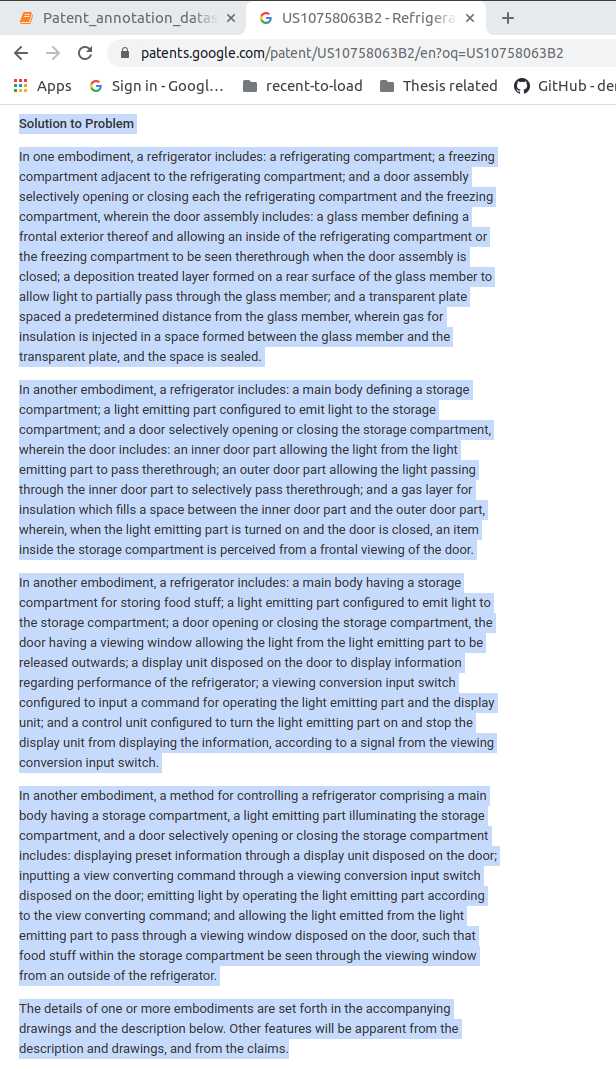

In [25]:
from IPython import display
display.Image("neutral_sample.png")